In [89]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from tqdm import tqdm
import copy

In [90]:
Types = {'electrique': 6210 , 'thermique':3740 } #le taux de co2 emis a la construction en kg 

CO2emisparkm = {'electrique': 0.02 , 'thermique':0.19 } #le taux de co2 emis par km en kg 

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

Proba_shortestpath = 0.8 #la proba de choisir le chemin le plus court

nb_voitures = 20

In [91]:
statut = {'normal':0.8,'bourée':0.10}
sexe = {"homme":0.7,'femme':0.3}
age = {"adulte":0.8,'vieux':0.2}
len(statut)

2

In [92]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

In [93]:
paris1m=[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [94]:
def co2_emission(distance,typee):
    "prend la distance en km et le type de la voiture et renvoie le taux de co2 emis"
    return distance * CO2emisparkm[typee]

In [95]:
def co2_construction ():
    "renvoie le taux de co2 emis lors de la construction de nos voitures"
    s = 0
    for a in Types_perc : 
        s += Types_perc[a]*nb_voitures*Types[a]
    return s

In [96]:
def ville_graphe(ville_m,lenmin,lenmax):
    """ Retourn le graphe de la ville à partir de la matrice d'adjacence. ville_m = matrice, lenmin = longueur min des routes,
    lenmax = longueur max des route. Tire aléatoirement la longueur des routes. On suppose que les routes n'ont pas de sens.   
    """
    i = len(ville_m)
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph

In [97]:
def random_position(len_ville_1m):
    """ Retourne la valeur du node de départ et celui d'arrivée de manière aléatoire. len_ville_1m = nb_colonne matrice"""
    depart = random.randint(0,len_ville_1m -1)
    arrivee = random.randint(0,len_ville_1m -1)
    
    while(depart == arrivee):
        arrivee = random.randint(0,len_ville_1m -1)
    return (depart, arrivee)

In [98]:
def path_choice (proba, ville, positiondepart, positionarrivé): 
    x = random.randint(1,10)
    if x<= proba*10: 
        return nx.shortest_path(ville, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
    else : 
        y = nx.all_simple_paths(ville, source=positiondepart, target=positionarrivé)
        L=[]
        for i in y:
            L.append(i)
        rnd = random.randint(0,len(L)-1)
        return  L[rnd]

In [99]:
def random_status(status):
  """ Prend un dictionnaire d'une condition/statut et renvoie une condition/statut de manière aléatoire """ 
  res = max(status)
  alea = random.random()
  if(status[res]>alea):
      return res
  else:
    for (k,v) in status.items():
      if(k!=res):
        return k



In [100]:
random_status(age)

'vieux'

In [101]:
def vitesse_dream(vitesse):
  """Fonction qui prend une vitesse règlementaire et qui renvoie une vitesse augmentée d'une variable aléatoire afin que les voitures dans 
  le cas du possible augmente leurs vitesses afin d'arriver à ce niveau de vitesse revé dans la route si rien ne leur font obstacle bien sur .
  On suppose aussi qu'on est dans une ville réglementé à 50 km """
  max = 40 
  " km "
  aléa = random.randint(5,max)
  res = vitesse + aléa
  return res


In [102]:
class Voiture:
    """ Création d'une voiture avec ses différents parametres"""
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max,villeg):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        self.dreamspeed =  vitesse_dream(vitesse)
        self.statut=random_status(statut)
        self.age=random_status(age)
        self.sexe=random_status(sexe)
        "chemin le plus cours a"
        self.chemin = path_choice (Proba_shortestpath,villeg,positiondepart, positionarrivé)
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr,lenvillem,villeg,proba):
        """ création de la population de voitures en prenant en compte le pourcentage de voitures éléctriques et terminques"""
        system=[]
        len_ville_1m = lenvillem
        for i in range(round(nbr*typesperc['electrique'])):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            pct = random.uniform(0.0,99.5)
            
            a = path_choice (proba,villeg,depart, arrivee)
            
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',depart,arrivee,((depart,a[1]),pct),50,Types_vitesseslimit['electrique'],villeg)
        
        for j in range(round(nbr*typesperc['thermique']), nbr):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            pct = random.uniform(0.0,99.5)
            b = path_choice (proba,villeg,depart, arrivee)
        
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',depart,arrivee,((depart,b[1]),pct),50,Types_vitesseslimit['thermique'],villeg)
        return system

In [103]:
def liste2tuple(chemin_liste):
    """ transforme une liste en tuple. Permet d'afficher le chemin sous forme de plusieurs tuples.
    chemin liste = liste du plus court chemin enregistré dans voiture.chemin"""
    chemin_tuple = []
    for i in range(len(chemin_liste)-1):
        chemin_tuple.append((chemin_liste[i],chemin_liste[i+1]))
    return chemin_tuple

In [104]:
def indice_chemin(chemin , tuplee):
    """ retourn l'indice du tuple (position) dans le chemin sous forme de liste de tuples. chemin = liste de tuples, 
    tuplee = le tuple / arrete à trouver"""
    for i in range(len(chemin)-1):
        if chemin[i]==tuplee:
            return i
    return 0 

In [105]:
def donne_longueur(tuple1, villeg):
    """ Retourn la longueur entre deux nodes reliés entre eux. """
    length = nx.get_edge_attributes(villeg,'len')
    for (tuple2,l) in length.items():
        if((tuple1[0]==tuple2[0]) and (tuple1[1]==tuple2[1])) or ((tuple1[0]==tuple2[1] )and (tuple1[1]==tuple2[0])) :
            return l
    return -1 

In [106]:
def change_distance(voiture,villeg,verbose=True):
    """ Cette fonction permet de deplacer une voiture pendant 10s. Elle modifie les parametres de la voiture :
    pourcentage de la distance parcouru sur une arrete, changement de node quand on arrive à la fin de l'arrete
    et ajout de la distance parcouru sur la nouvelle arrete"""
    
    chemin_liste = voiture.chemin
    chemin = liste2tuple(chemin_liste)
    distance_parcouru = (voiture.speed*10)/3600
    if voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0],villeg) > 100:
        if voiture.position[0][1]== voiture.positionarrivé:
            voiture.speed=0
            voiture.position=(voiture.position[0],100)
        else:
            if verbose:
                print()
                print("changement d'arrete " + "passage de " +str(chemin[indice_chemin(chemin,voiture.position[0]) - 1]) + " à :" + str(voiture.position[0]))
                print()
            voiture.position = (chemin[indice_chemin(chemin,voiture.position[0]) + 1],0)
        
    
    if voiture.position[1]<100 and voiture.speed!= 0:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0],villeg))  
        

In [107]:
def nb_voiture_edge_temp_reel(population):
    """ cette fonction compte le nombre de voiture sur chaque edge à chaque instant (10s). (u,v) = (v,u)"""
    popu = [v.position[0] for v in population]
    compte ={}
    #print(popu)
    for valeur1, valeur2 in popu:
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= popu.count((valeur1,valeur2)) + popu.count((valeur2,valeur1))
        
    return compte

In [108]:
def route_plus_sature(population):
    """ Retourne la liste des edges les plus fréquentés en temps réel """
    A = nb_voiture_edge_temp_reel(population)
    maxi = 0
    maxival = []
    for j,v in A.items():
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
   # print(A)
    #print()
    A.pop(maxiv)
    #print()
    #print(A)
    for i,k in A.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [109]:
def color_ville_g(ville_g, route_sature):
    """ affiche la ville avec l'arrete ou les arretes les plus fréquentées edgelist permet de choisir les arrete a colorer
    petit probleme à chaque affichage le graph ne garde pas la meme forme il n'est pas figé."""
    pos = nx.spring_layout(ville_g)
    nx.draw_networkx_edges(ville_g, pos,width=5.0, edgelist = route_sature ,edge_color='yellow', style='solid')
    #nx.draw_networkx_edge_labels(ville_g, pos)
    nx.draw(ville_g, pos, with_labels=True)

In [110]:
def route_plus_parcouru_simu(population, Verbose=True):
    """ Cette fonction concatene tous les chemin de la population sous forme de tuples et retourne le ou les tuples 
    possedent le plus d'occurences """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin) # concatene tous les chemins sous forme de tuple 
    
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))
    
    maxi = 0
    maxival = []
    if Verbose : 
        print(compte)
    for j,v in compte.items(): # permet de trouver le max exactement le même principe que route plus saturée  
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
    compte.pop(maxiv)
    for i,k in compte.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [111]:
def nombre_voiture_passage_edge(population):
    """ cette fonction concantene les chemin et un hist est creer pour représenter le nbr de voiture qui va passer sur
    chaque edges. petit probleme (u,v)!=(v,u) dans l'hist ils correspondent donc à deux route """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin)
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte:
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))

    abscisse = [str((y,x)) for (y,x),i in compte.items() ]
    ordonne = [i for (y,x),i in compte.items()]
    
    plt.bar(abscisse,ordonne)

In [112]:
def suppression_routes(villeg, nbroutes, Verbose = True) : 
    "fonction qui prend un graph d'une ville et supprime nbroutes routes et renvoie le nouveau graph"
    ville = villeg.copy()
    for i in range(nbroutes): 
        edges = nx.get_edge_attributes(ville,'len')
        listOfKeys = list(edges.keys())
        x = random.randint(0,len(listOfKeys)-1)
        a,b = listOfKeys[x]
        ville.remove_edge(a, b)
        if Verbose : 
            print("edge : ",a,b," removed")
    return ville

In [113]:
def villes_modifiées (villeg, n):
    "renvoie une liste qui contient la ville d'origine et n autres villes ou on a supprimé des villes au hasard"
    L = [villeg]
    for i in range(n): 
        temp = villeg.copy()
        ville = suppression_routes(temp,random.randint(1,2))
        print()
        L.append(ville)
    return L

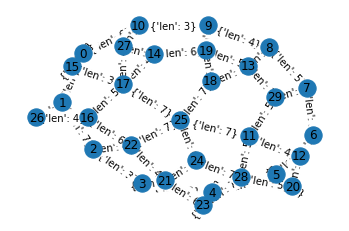

In [114]:
parisg = ville_graphe(paris1m, 3, 7 )

In [115]:
population = Voiture.spawn(Types_perc,nb_voitures,len(paris1m),parisg,Proba_shortestpath)

In [116]:
essai = population 

In [117]:
echantillion = population

In [118]:
population[0].position

((18, 25), 91.85396817465983)

In [119]:
def simulation(nbrvoiture,population,lenghtm, villeg, verbose=True, mapp = True, stat=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    restant = []
    popu = copy.deepcopy(population)
    route_plus_empreinte_simu = route_plus_parcouru_simu(popu,verbose)
    co2emis = 0
    
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
        print("la route qui sera la plus empreintée lors de la simu est : " + str(route_plus_empreinte_simu))
    
    
    for i in range(10000):
        for v in range(len(popu)):
            change_distance(popu[v], villeg,False)
            co2emis += co2_emission(popu[v].speed*10/3600,popu[v].type)
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v]) 
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
       
        
        
        nb_voiture_par_route = nb_voiture_edge_temp_reel(popu)
        route_sature = route_plus_sature(popu)
        
        if verbose:
            print("\nnombre de voiture sur chaques arretes: " + str(nb_voiture_par_route) + "\n")
            print("la route la plus empreintée est : " + str(route_sature) + " avec : " + str(nb_voiture_par_route[route_sature[0]]) + " voitures")
        
        if mapp:
            color_ville_g(villeg, route_sature)
            plt.show()
        
        if len(restant) == nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
                break
    if stat:
        plt.title("nombre de voitures par routes")
        plt.xlabel("nb voitures par routes")
        plt.ylabel("routes")
        print("nous pouvons bien voir que la/les route/s la/les plus empreinté/s est/sont : " + str(route_plus_empreinte_simu))
        nombre_voiture_passage_edge(popu) 
        plt.show()
    
    return co2emis 

In [120]:
simulation(nb_voitures, population,len(paris1m), parisg, False, False, False)

92.51666666666767

**- Ici on prend une ville de départ et on construit avec plusieurs autres villes et chaque ville représente la ville d'origine en lui retirant des routes au hasard.**

In [121]:
Villes = villes_modifiées (parisg,10)

edge :  16 17  removed
edge :  11 12  removed

edge :  3 21  removed
edge :  11 25  removed

edge :  7 29  removed
edge :  1 2  removed

edge :  5 20  removed
edge :  22 25  removed

edge :  12 20  removed

edge :  4 23  removed

edge :  17 25  removed
edge :  0 1  removed

edge :  14 19  removed
edge :  3 4  removed

edge :  12 20  removed

edge :  11 29  removed



In [122]:
def simulations (villes, nbrvoiture,p ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,p,lenghtm,villes[0],verbose,mapp,stat)
    minindice = 0
    for i in range(len(villes)):
        x.append(i)
        temp = simulation(nb_voitures,p,lenghtm,villes[i],verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la ville")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ('la ville avec le moins demission de co2 est la ville numero',minindice+1)
    pos = nx.spring_layout(villes[minindice])
    nx.draw_networkx_edges(villes[minindice],pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(villes[minindice], pos)
    nx.draw(villes[minindice], pos, with_labels=True)

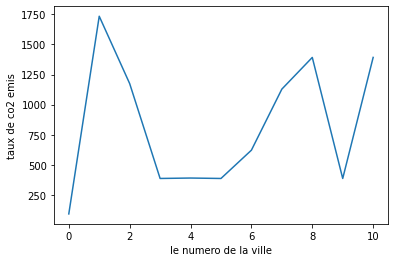

la ville avec le moins demission de co2 est la ville numero 1


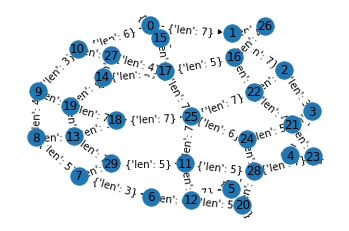

In [123]:
simulations(Villes,nb_voitures, population,len(paris1m), False, False, False)


**-Ici on fait varier le pourcentage de prendre le chemin le plus court**

In [124]:
def populations(population,ville): 
    "Prend en paramétre une population d'origine pour avoir les meme parametre et on change seulement le chemin"
    L = []
    for i in range (1,11):
        popu = copy.deepcopy(population)
        for v in popu:
            v.chemin =path_choice (i/10.0,ville,v.positiondepart, v.positionarrivé)
        L.append(popu)
    return L

In [125]:
def simulations2 (ville, nbrvoiture,Listepopu ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,Listepopu[0],lenghtm,ville,verbose,mapp,stat)
    minindice = 0
    for i in range(len(Listepopu)):
        x.append(i)
        temp = simulation(nb_voitures,Listepopu[i],lenghtm,ville,verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la population")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ("la population avec le moins d'emission de co2 est la population numero",minindice+1)

In [126]:
popu2 = Voiture.spawn(Types_perc,nb_voitures,len(paris1m),parisg, Proba_shortestpath)

In [127]:
Listepopu = populations(popu2,parisg)

In [128]:
Listessai = Listepopu 

In [129]:
Listechan = Listepopu 

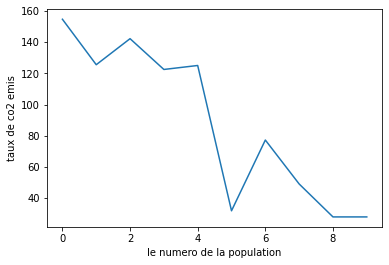

la population avec le moins d'emission de co2 est la population numero 9


In [130]:
simulations2(parisg,nb_voitures, Listepopu,len(paris1m), False, False, False)

# Dynamique 

La dynamique est la suivante soit une voiture prit dans la liste on regarde tous les autres voitures et on regarde si elle possède des voisins(voiture devant elle) si elle en a pas devant elle alors :
elle peut accélérer selon une probabilité pour créer un système de comportement qui diffère des individus sinon si le pourcentage de deux vehicules est inférieur à l (mesure pour exprimer la distance de sécurité entre deux voiture ) alors la voiture avec le plus faible pourcentage décélère tout en ayant une vitesse plus grande que celle derrière elle , si la distance entre deux voiture est plus petite que eps alors on considère que deux voitures se sont entre choqué et on considère un état de bouchon où toute les voitures de la route sont bloqué on fera en sorte que les voitures qui ne sont pas dans le bouchon essaierons de chercher un autre chemin que celle de la route bouché si possible sinon elle entrainerons un bouchon continu jusqu'a que le problème soit réglé Hypothétiquement nous pourrons prendre en compte l'état du conducteur ( normal ,bourré,drogué ) , l'age du conducteur et son sexe. 


In [131]:
def make_all_route(route):
    """Fonction qui crée un dictionnaire tuple,longueur mais avec cette fois toute les tuples ex(10,11) et (11,10)
    afin de créer toute les routes possibles pour la fonction leader_follow """
    res = {}
    for (tuples,longueur) in route.items():
        a,b=tuples
        res[(a,b)]=longueur
        res[(b,a)]=longueur
    return res 

In [132]:
print(make_all_route(nx.get_edge_attributes(parisg,'len')))

{(0, 1): 7, (1, 0): 7, (0, 10): 6, (10, 0): 6, (0, 15): 6, (15, 0): 6, (1, 2): 7, (2, 1): 7, (1, 26): 5, (26, 1): 5, (2, 3): 3, (3, 2): 3, (2, 22): 5, (22, 2): 5, (3, 4): 3, (4, 3): 3, (3, 21): 3, (21, 3): 3, (4, 5): 7, (5, 4): 7, (4, 23): 4, (23, 4): 4, (5, 6): 7, (6, 5): 7, (5, 20): 6, (20, 5): 6, (6, 7): 3, (7, 6): 3, (6, 12): 6, (12, 6): 6, (7, 8): 5, (8, 7): 5, (7, 29): 6, (29, 7): 6, (8, 9): 4, (9, 8): 4, (8, 13): 6, (13, 8): 6, (9, 10): 3, (10, 9): 3, (9, 19): 4, (19, 9): 4, (10, 27): 6, (27, 10): 6, (11, 12): 4, (12, 11): 4, (11, 25): 7, (25, 11): 7, (11, 28): 5, (28, 11): 5, (11, 29): 5, (29, 11): 5, (12, 20): 5, (20, 12): 5, (13, 18): 7, (18, 13): 7, (13, 19): 5, (19, 13): 5, (13, 29): 7, (29, 13): 7, (14, 17): 4, (17, 14): 4, (14, 19): 6, (19, 14): 6, (14, 27): 4, (27, 14): 4, (15, 17): 3, (17, 15): 3, (16, 17): 5, (17, 16): 5, (16, 22): 6, (22, 16): 6, (16, 26): 4, (26, 16): 4, (17, 25): 7, (25, 17): 7, (17, 27): 4, (27, 17): 4, (18, 19): 7, (19, 18): 7, (18, 25): 7, (25, 1

In [133]:
def search_car(pos,liste_voiture):
    """Renvoie une liste de toutes les voitures dans la node (x,y) parmi toutes les voitures"""
    res=[]
    for v in liste_voiture:
        if v.position[0]==pos:
            res.append(v)
    return res 

In [134]:
car=Voiture.spawn(Types_perc,30,len(ville_1m),parisg, Proba_shortestpath)
net=search_car((1,2),car)
for i in range(len(net)):
  print(net[i].position[0],net[i].position[1])

In [135]:
def trie_voiture(l):
    """Renvoie une liste de voiture trié par pourcentage (ordre croissant) 
    hypothèse : on suppose qu'il sont dans la même node """
    n=None
    p=n
    for i in range(len(l)):
        for j in range(len(l)-(i+1)):
            if l[j].position[1]>l[j+1].position[1]:
                n=l[j]
                l[j]=l[j+1]
                l[j+1]=n
            if n==p:
                return None
    

In [136]:
def liste_decroissante(liste):
  """Prend une liste trié de vehicule en ordre croissant et renvoie la même liste à la différence notable qu'elle est trié en
  ordre décroissant """
  res=[]
  i = len(liste) -1
  while(i>=0):
    res.append(v[i])
    i=i-1
  return res 

In [137]:
v= Voiture.spawn(Types_perc,10,len(ville_1m),parisg,Proba_shortestpath)
l1=[29.3,12.5,19.8,6.9,55.1,44.4,77.8,23.6,65.2,55.8]
for j in range(len(v)):
  v[j].position=(v[j].position[0],l1[j])
trie_voiture(v)
for i in range(len(v)):
  print(v[i].position[0],v[i].position[1])
v=liste_decroissante(v)
print("ok")
for i in range(len(v)):
  print(v[i].position[0],v[i].position[1])
v[1].statut

(11, 12) 6.9
(4, 5) 12.5
(10, 27) 19.8
(9, 10) 23.6
(10, 0) 29.3
(3, 2) 44.4
(1, 2) 55.1
(5, 6) 55.8
(3, 2) 65.2
(3, 4) 77.8
ok
(3, 4) 77.8
(3, 2) 65.2
(5, 6) 55.8
(1, 2) 55.1
(3, 2) 44.4
(10, 0) 29.3
(9, 10) 23.6
(10, 27) 19.8
(4, 5) 12.5
(11, 12) 6.9


'normal'

In [138]:
def dict_node_vehicule(liste_voiture,ville):
    """Une fonction qui prend en paramètre une liste de voiture et une ville afin d'obtenir dans un dictionnaire pour chaque couple de 
    node de la ville une liste qui représente les véhicules dans la node trié en ordre décroissant (j'aurais pu laisser en ordre croissant mais pour la 
    boucle cela me semblerai plus simple à manipuler quand on va faire des actions sur la vitesse des véhicules) """
    v_all={}     
    tmp =[] 
    """" dictionnairaire qui va me récupérer toutes les voitures d'un tuple de node"""
    all_node=make_all_route(nx.get_edge_attributes(ville,'len'))
    for (k,v) in all_node.items():
        tmp=search_car(k,liste_voiture)
        trie_voiture(tmp)
        v_all[k]=tmp
    """Pour des raisons obsures je ne peux pas utiliser la fonction liste_decroissante dans cette fonction donc les listes sont 
    ordonnée en ordre croissant  """
    return v_all 


In [139]:
test = Voiture.spawn(Types_perc,nb_voitures,len(ville_1m),parisg,Proba_shortestpath)
print(len(test))
dico = dict_node_vehicule(test,parisg)
j=0
for (k,v) in dico.items():
  for i in range(len(v)):
    if(j<6):
      print(v[i].position[0],v[i].position[1])
      j=j+1
    else:
      break 

20
(0, 1) 8.205084477548853
(1, 0) 5.738517362915044
(1, 0) 37.95522099724269
(0, 10) 81.99389964250643
(10, 0) 31.896740248481912
(1, 2) 71.37578654552489


In [140]:
def var_vitesse(dv):
  """Fonction qui doit changer la vitesse de toutes les voitures en faisant une boucle sur deux voitures et qui décident de leur comportement
  (changement de vitesse selon la vitesse rêvé  mis dans le paramètre de la voiture) en fonction de la distance qui les séparent de la voiture devant eux 
  ralentisse si une voiture est proche d'elle (par devant) bien sur la première voiture de la route peut accelérer comme elle le souaite  
  A definir : la distance entre deux voitures pour laquelle la voiture peut accelerer ou ralentir 
  Paramètres : dictionnaire de liste de voiture """
  """Note : les listes du dictionnaires sont pour l'instant en ordre croissant """
  for (k,v) in dv.items():
      i=len(v)-1
      while(i>=1):
        if(i==len(v)-1):
          if(v[i].position[1]>89):
            v[i].speed=v[i].speed+(v[i].dreamspeed/4)
            
          else:
            v[i].speed=v[i].speed+(v[i].dreamspeed/2)
            
        else:
          if(abs(v[i+1].position[1]-v[i].position[1])<3):
            v[i].speed=v[i].speed*0.05
            
          elif(abs(v[i+1].position[1]-v[i].position[1])<=5):
            v[i].speed=v[i].speed*0.20

          elif(abs(v[i+1].position[1]-v[i].position[1])>=35):
            v[i].speed=v[i].speed+(v[i].dreamspeed/3)

          else:
            v[i].speed=v[i].speed+(v[i].dreamspeed/5)

        if(v[i].speed > v[i].dreamspeed):
          v[i].speed=v[i].dreamspeed
        "fait pour limiter la vitesse actuelle à vitesse dream vous pouvez l'enlever si vous voulez cela change un peu les resultats "
        i=i-1
        

      






j'ai mis des valeurs au pif pour les changements de vitesse des vehicules 
si vous voulez changer les valeurs allez-y 

Test avec les fonctions de simulations 

In [141]:
def simulation1(nbrvoiture,population,lenghtm, villeg, verbose=True, mapp = True, stat=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    restant = []
    popu = copy.deepcopy(population)
    route_plus_empreinte_simu = route_plus_parcouru_simu(popu,verbose)
    routes_et_nodes = dict_node_vehicule(popu,villeg)
    co2emis = 0
    
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
        print("la route qui sera la plus empreintée lors de la simu est : " + str(route_plus_empreinte_simu))
    
    
    for i in range(10000):
        for v in range(len(popu)):
            change_distance(popu[v], villeg,False)
            co2emis += co2_emission(popu[v].speed*10/3600,popu[v].type)
            var_vitesse(routes_et_nodes)
            routes_et_nodes = dict_node_vehicule(popu,villeg)
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v]) 
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
       
        
        
        nb_voiture_par_route = nb_voiture_edge_temp_reel(popu)
        route_sature = route_plus_sature(popu)
        
        if verbose:
            print("\nnombre de voiture sur chaques arretes: " + str(nb_voiture_par_route) + "\n")
            print("la route la plus empreintée est : " + str(route_sature) + " avec : " + str(nb_voiture_par_route[route_sature[0]]) + " voitures")
        
        if mapp:
            color_ville_g(villeg, route_sature)
            plt.show()
        
        if len(restant) == nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
                break
    if stat:
        plt.title("nombre de voitures par routes")
        plt.xlabel("nb voitures par routes")
        plt.ylabel("routes")
        print("nous pouvons bien voir que la/les route/s la/les plus empreinté/s est/sont : " + str(route_plus_empreinte_simu))
        nombre_voiture_passage_edge(popu) 
        plt.show()
    
    return co2emis 

In [142]:
simulation1(nb_voitures, essai,len(paris1m), parisg, False, False, False)

59.081027777778495

In [143]:
def simulations20 (ville, nbrvoiture,Listepopu ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,Listepopu[0],lenghtm,ville,verbose,mapp,stat)
    minindice = 0
    for i in range(len(Listepopu)):
        x.append(i)
        temp = simulation1(nb_voitures,Listepopu[i],lenghtm,ville,verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la population")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ("la population avec le moins d'emission de co2 est la population numero",minindice+1)

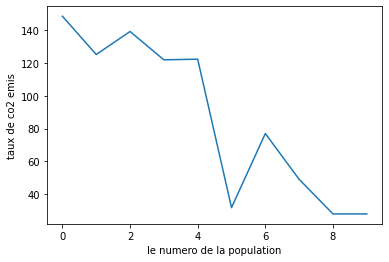

la population avec le moins d'emission de co2 est la population numero 9


In [144]:
simulations20(parisg,nb_voitures, Listessai,len(paris1m), False, False, False)

Simulation20 est très long 


Test de la simulation avec des variations de vitesse en plus gérer de par la vitesse mais aussi par les caractères lié à l'age ,au sexe et à l'état de l'individu 

In [145]:
def change_vitesse(dv):
  """Fonction qui change la vitesse des vehicules de la liste selon la distance qui les séparent des autres et aussi selon les attributs
  de l'individu"""
  for (k,v) in dv.items():
      i=len(v)-1
      while(i>=1):
        if(i==len(v)-1):
          if(v[i].statut=='normal'):

            if(v[i].age=="vieux"):

              if(v[i].position[1]>89):
                v[i].speed=v[i].speed+(v[i].dreamspeed/3)
            
              else:
                v[i].speed=v[i].speed+(v[i].dreamspeed/1.7)
            else:

              if(v[i].position[1]>89):
                v[i].speed=v[i].speed+(v[i].dreamspeed/4)
            
              else:
                v[i].speed=v[i].speed+(v[i].dreamspeed/2)
          else:
            v[i].speed=v[i].speed+(v[i].dreamspeed/1.4)  
            
        else:
          if(v[i].statut=='normal'):
            if(v[i].sexe=='homme'):
              if(abs(v[i+1].position[1]-v[i].position[1])<3):
                v[i].speed=v[i].speed*0.05
            
              elif(abs(v[i+1].position[1]-v[i].position[1])<=5):
                v[i].speed=v[i].speed*0.25

              elif(abs(v[i+1].position[1]-v[i].position[1])>=12):
                v[i].speed=v[i].speed+(v[i].dreamspeed/2)

              else:
                v[i].speed=v[i].speed+(v[i].dreamspeed/3)
            else:
              if(abs(v[i+1].position[1]-v[i].position[1])<3):
                v[i].speed=v[i].speed*0.05
            
              elif(abs(v[i+1].position[1]-v[i].position[1])<=5):
                v[i].speed=v[i].speed*0.20

              elif(abs(v[i+1].position[1]-v[i].position[1])>=17):
                v[i].speed=v[i].speed+(v[i].dreamspeed/3)

              else:
                v[i].speed=v[i].speed+(v[i].dreamspeed/4)
          else:
              if(abs(v[i+1].position[1]-v[i].position[1])<2):
                v[i].speed=v[i].speed*0.05
              else:
                v[i].speed=v[i].speed+(v[i].dreamspeed/1.8)
        if(v[i].speed > v[i].dreamspeed):
          v[i].speed=v[i].dreamspeed

        i=i-1




In [146]:
def simulation2v(nbrvoiture,population,lenghtm, villeg, verbose=True, mapp = True, stat=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    restant = []
    popu = copy.deepcopy(population)
    route_plus_empreinte_simu = route_plus_parcouru_simu(popu,verbose)
    routes_et_nodes = dict_node_vehicule(popu,villeg)
    co2emis = 0
    
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
        print("la route qui sera la plus empreintée lors de la simu est : " + str(route_plus_empreinte_simu))
    
    
    for i in range(10000):
        for v in range(len(popu)):
            change_distance(popu[v], villeg,False)
            co2emis += co2_emission(popu[v].speed*10/3600,popu[v].type)
            change_vitesse(routes_et_nodes)
            routes_et_nodes = dict_node_vehicule(popu,villeg)
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v]) 
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
       
        
        
        nb_voiture_par_route = nb_voiture_edge_temp_reel(popu)
        route_sature = route_plus_sature(popu)
        
        if verbose:
            print("\nnombre de voiture sur chaques arretes: " + str(nb_voiture_par_route) + "\n")
            print("la route la plus empreintée est : " + str(route_sature) + " avec : " + str(nb_voiture_par_route[route_sature[0]]) + " voitures")
        
        if mapp:
            color_ville_g(villeg, route_sature)
            plt.show()
        
        if len(restant) == nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
                break
    if stat:
        plt.title("nombre de voitures par routes")
        plt.xlabel("nb voitures par routes")
        plt.ylabel("routes")
        print("nous pouvons bien voir que la/les route/s la/les plus empreinté/s est/sont : " + str(route_plus_empreinte_simu))
        nombre_voiture_passage_edge(popu) 
        plt.show()
    
    return co2emis 

In [148]:
simulation2v(nb_voitures,echantillion ,len(paris1m), parisg, False, False, False)

92.1170000000005

In [149]:
def simulations20v (ville, nbrvoiture,Listepopu ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,Listepopu[0],lenghtm,ville,verbose,mapp,stat)
    minindice = 0
    for i in range(len(Listepopu)):
        x.append(i)
        temp = simulation2v(nb_voitures,Listepopu[i],lenghtm,ville,verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la population")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ("la population avec le moins d'emission de co2 est la population numero",minindice+1)

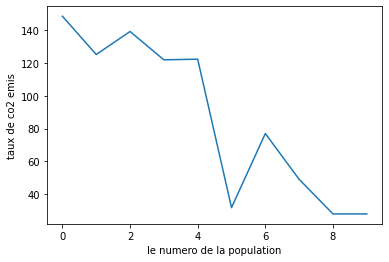

la population avec le moins d'emission de co2 est la population numero 9


In [150]:
simulations20(parisg,nb_voitures, Listechan,len(paris1m), False, False, False)